# Battery Discharge

Mathematical models, and in particular ordinary differential equations (ODEs), play a key role in enabling the dynamic representation of the state of charge (SOC) of a battery over time. These tools provide a theoretical basis for predicting the behaviour of batteries under different operating and charging scenarios.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Physical parameters
E0 = 7.4                # Initial voltage of the two batteries in series (V)
r = 0.05 + 10           # Internal resistance (Ohm) + LED resistance (Ohm)
T = 292.15              # Temperature (K)
R = 8.314               # Gas constant (J/mol-K)
F = 96485               # Faraday's constant (C/mol)
z = 1                   # Number of electrons (lithium)
Ke = (R * T) / (z * F)  # Thermal-electrochemical constant

In [4]:
# Discharge parameters
N = 4.8                # Rated capacity (Ah)
lambda_ = 7 * 0.02      # Discharge current of the 7 LEDS (A)
t_max = N / lambda_     # Theoretical maximum time
t = np.linspace(0, t_max, 100)

In [5]:
# 1. Classic Nernst model
u_t = N - lambda_ * t
u_t_line = u_t / N
E_t = E0 - lambda_ * r + Ke * np.log(u_t_line)

C:\Users\DELL\AppData\Local\Temp\ipykernel_13340\931131599.py:4: RuntimeWarning: invalid value encountered in log
  E_t = E0 - lambda_ * r + Ke * np.log(u_t_line)


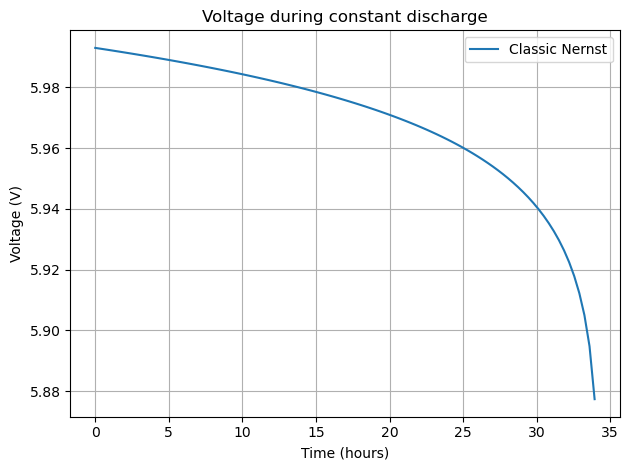

In [6]:
# 2. Graph Classic Nernst model
plt.figure()
plt.plot(t, E_t, label="Classic Nernst")
plt.title("Voltage during constant discharge")
plt.xlabel("Time (hours)")
plt.ylabel("Voltage (V)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [7]:
import pandas as pd

In [8]:
df = pd.read_excel(r'C:\Users\DELL\OneDrive - Fundación Universitaria Konrad Lorenz\IV SEMESTRE\COMPUTACION I\Proyecto\data_discharge.xlsx') #change your PC
real_time = df['Time (h)']
real_voltage = df['Voltage (V)']

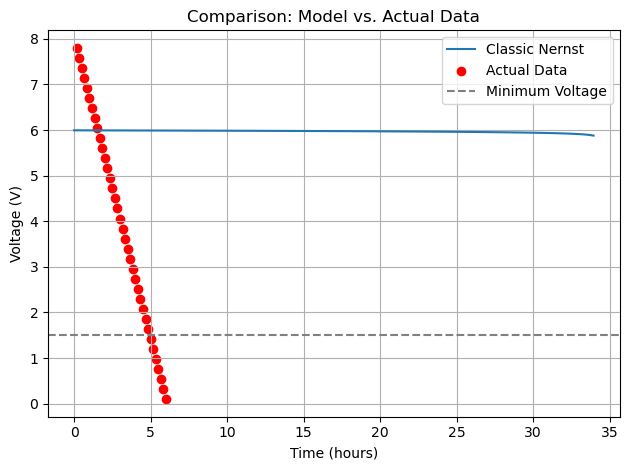

In [9]:
# 3. Comparative graphs Model's - Actual Data
plt.figure()
plt.plot(t, E_t, label="Classic Nernst")
plt.scatter(real_time, real_voltage, label="Actual Data", color='red')
plt.axhline(y=1.5, color='gray', linestyle='--', label='Minimum Voltage')
plt.title("Comparison: Model vs. Actual Data")
plt.xlabel("Time (hours)")
plt.ylabel("Voltage (V)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### References

- Kaj, I., & Konané, V. (2016). *Modeling battery cells under discharge using kinetic and stochastic battery models*. Applied Mathematical Modelling, 40(7901–7915).
